In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
def displayVectors(startVector,rotatedVector):
    fig, ax = plt.subplots(figsize=(10,10))
    rads=np.linspace(0,2*np.pi,1000)
    ax.plot(np.sin(rads),np.cos(rads))
    ax.plot([0,startVector[0]],[0,startVector[1]])
    ax.plot([0,rotatedVector[0]],[0,rotatedVector[1]])
    ax.axis('equal')
    angulo=(startVector-rotatedVector)
    angulo=np.sqrt(angulo[0]**2+angulo[1]**2)
    angulo=angulo/2
    angulo=2*np.arcsin(angulo)
    angulo=angulo*180/np.pi
    titulo='Ángulo comprendido:%s'%angulo
    ax.set(title=titulo)
    #ax.set(ylim=[-1,1],xlim=[-1,1])
    #plt.xticks(np.linspace(-1,1,11))
    #plt.yticks(np.linspace(-1,1,11))

## Explicación del algoritmo en Wikipedia
Rotation mode
CORDIC can be used to calculate a number of different functions. This explanation shows how to use CORDIC in rotation mode to calculate the sine and cosine of an angle, and assumes the desired angle is given in radians and represented in a fixed-point format. To determine the sine or cosine for an angle $\beta$ , the y or x coordinate of a point on the unit circle corresponding to the desired angle must be found. Using CORDIC, one would start with the vector $v_{0}$:

$$v_{0}=\begin{bmatrix}1\\0\end{bmatrix}$$

In the first iteration, this vector is rotated 45° counterclockwise to get the vector $v_{1}$. Successive iterations rotate the vector in one or the other direction by size-decreasing steps, until the desired angle has been achieved. Step $i$ size is $\arctan {(2^{-i})}$ for $i=0,1,2,...$.

More formally, every iteration calculates a rotation, which is performed by multiplying the vector $v_{i-1}$ with the rotation matrix $R_{i}$:

$$v_{i}=R_{i}v_{i-1}$$
The rotation matrix is given by:

$$R_{i}={\begin{bmatrix}\cos(\gamma _{i})&-\sin(\gamma _{i})\\\sin(\gamma _{i})&\cos(\gamma _{i})\end{bmatrix}}$$
Using the following two trigonometric identities:

${\begin{aligned}\cos(\gamma _{i})&={1 \over {\sqrt {1+\tan ^{2}(\gamma _{i})}}}\\\sin(\gamma _{i})&={{\tan(\gamma _{i})} \over {\sqrt {1+\tan ^{2}(\gamma _{i})}}}\end{aligned}}$
the rotation matrix becomes:

$R_{i}={1 \over {\sqrt {1+\tan ^{2}(\gamma _{i})}}}{\begin{bmatrix}1&-\tan(\gamma _{i})\\\tan(\gamma _{i})&1\end{bmatrix}}$
The expression for the rotated vector $v_{i}=R_{i}v_{i-1}$ then becomes:

$v_{i}={1 \over {\sqrt {1+\tan ^{2}(\gamma _{i})}}}{\begin{bmatrix}1&-\tan(\gamma _{i})\\\tan(\gamma _{i})&1\end{bmatrix}}{\begin{bmatrix}x_{i-1}\\y_{i-1}\end{bmatrix}}$
where $x_{i-1}$ and $y_{i-1}$ are the components of $v_{i-1}$. Restricting the angles $\gamma _{i}$ so that $\tan(\gamma _{i})$ takes on the values $\pm 2^{-i}$, the multiplication with the tangent can be replaced by a division by a power of two, which is efficiently done in digital computer hardware using a bit shift. The expression then becomes:

$v_{i}=K_{i}{\begin{bmatrix}1&-\sigma _{i}2^{-i}\\\sigma _{i}2^{-i}&1\end{bmatrix}}{\begin{bmatrix}x_{i-1}\\y_{i-1}\end{bmatrix}}$
where

$K_{i}={1 \over {\sqrt {1+2^{-2i}}}}$
and $\sigma _{i}$ can have the values of −1 or 1, and is used to determine the direction of the rotation; if the angle $\gamma _{i}$ is positive then $\sigma _{i}$ is +1, otherwise it is −1.

$K_{i}$ can be ignored in the iterative process and then applied afterward with a scaling factor:

$K(n)=\prod _{i=0}^{n-1}K_{i}=\prod _{i=0}^{n-1}{1 \over {\sqrt {1+2^{-2i}}}}$
which is calculated in advance and stored in a table, or as a single constant if the number of iterations is fixed. This correction could also be made in advance, by scaling $v_{0}$ and hence saving a multiplication. Additionally it can be noted that:

$K=\lim _{n\to \infty }K(n)\approx 0.6072529350088812561694$
to allow further reduction of the algorithm's complexity. Some applications may avoid correcting for $K$ altogether, resulting in a processing gain $A$:

$A={1 \over K}=\lim _{n\to \infty }\prod _{i=0}^{n-1}{\sqrt {1+2^{-2i}}}\approx 1.64676025812107$
After a sufficient number of iterations, the vector's angle will be close to the wanted angle $\beta$. For most ordinary purposes, 40 iterations (n = 40) is sufficient to obtain the correct result to the 10th decimal place.

The only task left is to determine if the rotation should be clockwise or counterclockwise at each iteration (choosing the value of $\sigma$ ). This is done by keeping track of how much the angle was rotated at each iteration and subtracting that from the wanted angle; then in order to get closer to the wanted angle $\beta$, if $\beta _{n+1}$ is positive, the rotation is clockwise, otherwise it is negative and the rotation is counterclockwise.

$\beta _{i}=\beta _{i-1}-\sigma _{i}\gamma _{i}.\quad \gamma _{i}=\arctan(2^{-i}),$
The values of $\arctan(\gamma _{n})=\gamma _{n}$ in fixed-point representation, reducing table size.

As can be seen in the illustration above, the sine of the angle $\beta$  is the y coordinate of the final vector $v_{n}$, while the x coordinate is the cosine value.

In [3]:
n=16 # Iteraciones de K para el algoritmo CORDIC
K=np.zeros(n)
K[0]=1/(np.sqrt(1+np.power(2,-2*0))) # Constante para escalar los vectores despues de las iteraciones
i=1
while i<n:
    K[i]=1/(np.sqrt(1+1/np.power(2,2*i)))*K[i-1]
    i=i+1

pasos=np.arctan(1/np.power(2,range(0,16)))*180/np.pi # Angulo de rotación en cada iteración

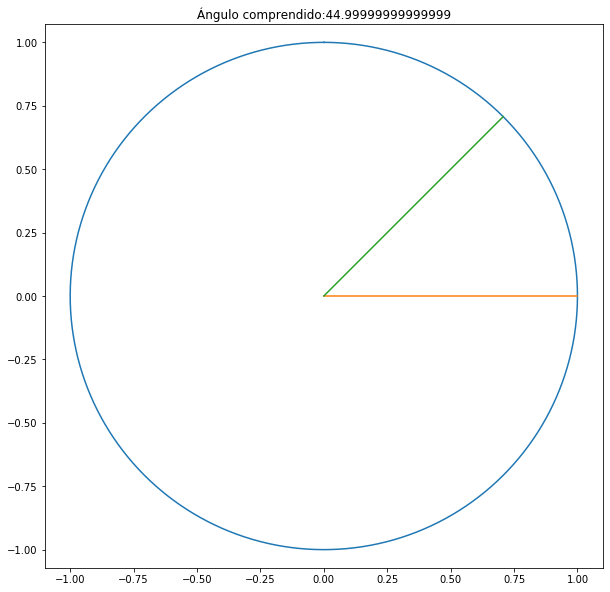

In [5]:
# Este algorimo solo hace la cantidad de iteraciones que le digas en el sentido que le digas
sentido=1
it=0 # Cantidad de iteraciones

VectorInicial=[1,0]
# Inicialización
i=0
vectorRotado=VectorInicial
# Ciclo
while i<=it:
    vectorRotado=np.matmul([[1,-sentido/np.power(2,i)],[sentido/np.power(2,i), 1]],vectorRotado)
    i=i+1
vectorRotado=vectorRotado*K[it] # escalado del vector

displayVectors(VectorInicial,vectorRotado)

Iteraciones: 0
0.012217000835247169
0.0078125


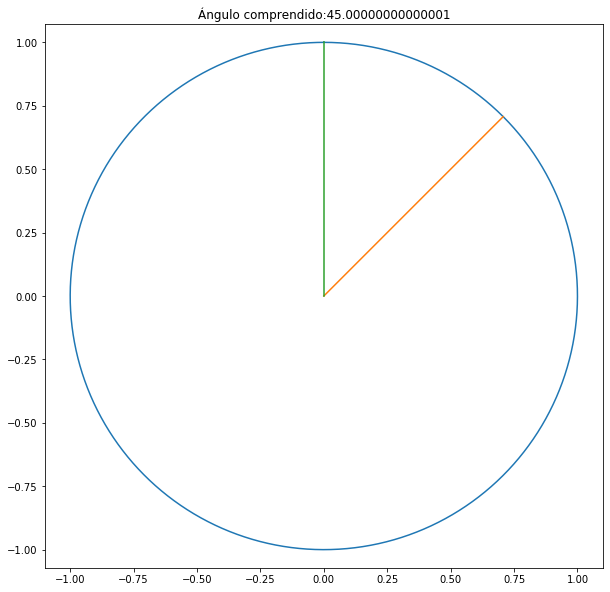

In [35]:
#Este sería el algorimo que te gira los vectores
#Parámetros
anguloInicial=45
angulo=45 #tiene que ser menor a 90º
tolerancia=.5

# Inicializaciones
vectorInicial=[np.cos(anguloInicial/180*np.pi),np.sin(anguloInicial/180*np.pi)]
vectorRotado=vectorInicial
anguloActual=anguloInicial
anguloMeta=anguloInicial+angulo
i=0
# Ciclo
while (np.abs(anguloMeta-anguloActual)>tolerancia):
    if anguloMeta>anguloActual:
        sentido=1
    else:
        sentido=-1
    vectorRotado=np.matmul([[1,-sentido/np.power(2,i)],[sentido/np.power(2,i), 1]],vectorRotado)
    anguloActual=anguloActual+sentido*pasos[i]
    i=i+1
vectorRotado=vectorRotado*K[i-1]

displayVectors(vectorInicial,vectorRotado)
print('Iteraciones:',i-1)

# Jugando con los ángulos y este grafico, pude ver que con tener una resolución de más de 1º
# ya no sería apreciable en el monitor de 640x480
# Para poder discernir 1º, x e y tienen que poder cuantificar diferencias de 1º
# Al parecer esto puede lograrse con 6 bits (uno más por el bit de signo)
# Igual el informe dice que el paso tiene que ser 0.7º
#Así que seran 7 bits
print(np.sin(0.7*np.pi/180))
print(1/128)

In [5]:
#En esta celda pasaría el algoritmo a int para poder usarlo en la FPGA


In [34]:
print(pasos)
pasos_int=np.array(pasos/180*2**31,'int32')
print(str(bin(pasos_int[15])), 2**16)
pasos_int

[4.50000000e+01 2.65650512e+01 1.40362435e+01 7.12501635e+00
 3.57633437e+00 1.78991061e+00 8.95173710e-01 4.47614171e-01
 2.23810500e-01 1.11905677e-01 5.59528919e-02 2.79764526e-02
 1.39882271e-02 6.99411368e-03 3.49705685e-03 1.74852843e-03]
0b101000101111100 65536


array([536870912, 316933405, 167458907,  85004756,  42667331,  21354465,
        10679838,   5340245,   2670163,   1335086,    667544,    333772,
          166886,     83443,     41721,     20860])

In [36]:
print(K)
K_int=np.array(K/1*2**31,'int32')
print(K_int)
K_int

[0.70710678 0.63245553 0.61357199 0.60883391 0.60764826 0.60735177
 0.60727764 0.60725911 0.60725448 0.60725332 0.60725303 0.60725296
 0.60725294 0.60725294 0.60725294 0.60725294]
[1518500249 1358187913 1317635817 1307460871 1304914694 1304277994
 1304118810 1304079013 1304069064 1304066577 1304065955 1304065799
 1304065761 1304065751 1304065748 1304065748]


array([1518500249, 1358187913, 1317635817, 1307460871, 1304914694,
       1304277994, 1304118810, 1304079013, 1304069064, 1304066577,
       1304065955, 1304065799, 1304065761, 1304065751, 1304065748,
       1304065748])